In [1]:
# import libraries
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# load dataset and train to pandas dataframe format
dataset = load_dataset('lukebarousse/data_jobs')
dataframe = dataset['train'].to_pandas()

# clean data in the date and skills columns
dataframe['job_posted_date'] = pd.to_datetime(dataframe['job_posted_date'])
dataframe['job_skills'] = dataframe['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else (x))

# good practice to create a copy of your dataframe before using
df = dataframe.copy()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\emeka\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Mon Nov 17 04:32:09 2025).


In [2]:

df_DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
df_plot = df_DA_USA['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


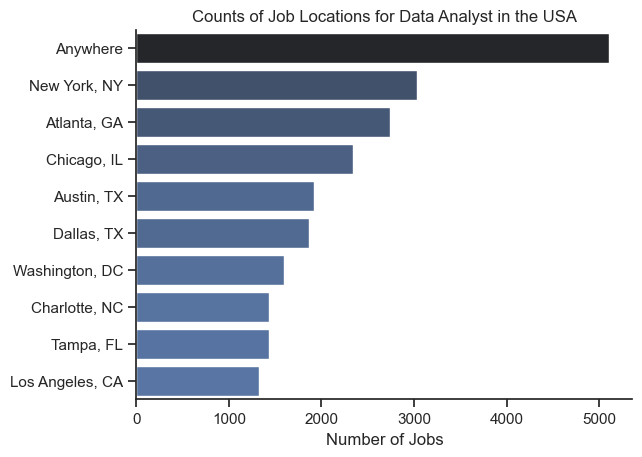

In [4]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the USA')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()

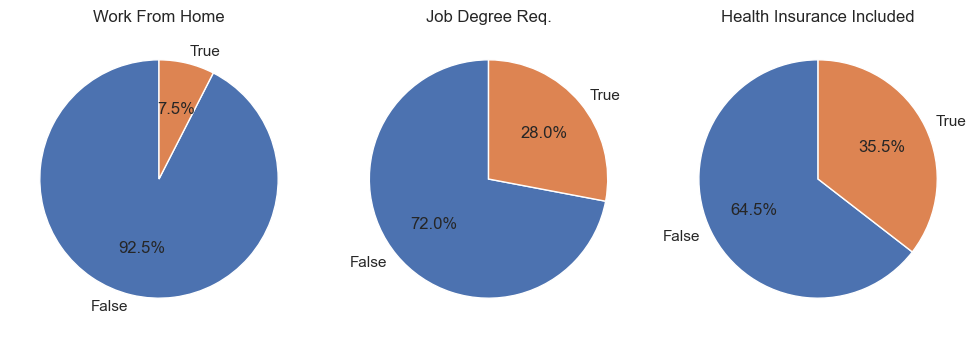

In [5]:
dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Included'
}

fig, ax = plt.subplots(1, len(dict_column), figsize= (10,5))

for i, (column, title) in enumerate (dict_column.items()):
    # .items() is a method that returns a tuple when passed on a dictionary
    ax[i].pie(df_DA_USA[column].value_counts(), startangle=90, autopct='%1.1f%%', labels= ['False', 'True'])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

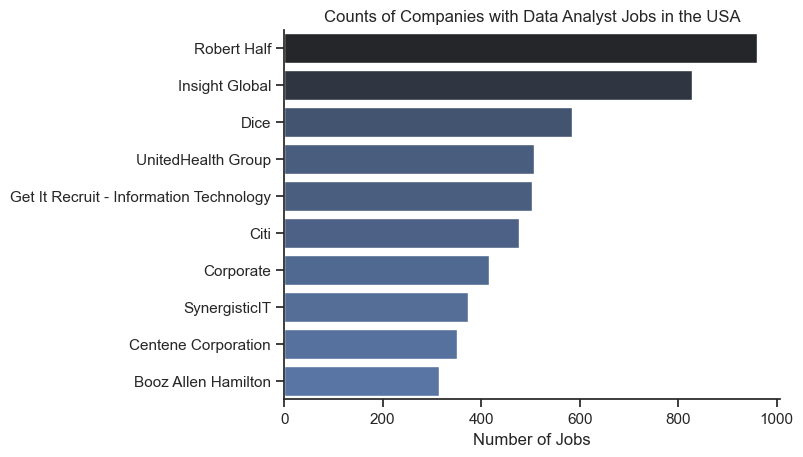

In [6]:
df_plot = df_DA_USA['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies with Data Analyst Jobs in the USA')
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.show()